In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

train = pd.read_csv("data/train_data.csv")
test = pd.read_csv("data/test_data.csv")

### Defining used columns and target classes

In [2]:
features = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
            'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
            'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol',
            'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein',
            'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'tartar',
            'bmi', 'healthy_weight', 'eyesight_total', 'vision', 'hearing_impairment']
classNames=["not smoking","smoking"]
Y_train = train["smoking"]
X_train = train[features]
Y_test = test["smoking"]
X_test = test[features]
X_train

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,ast,alt,gtp,dental_caries,tartar,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,35.0,53.0,61.0,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,40.0,47.0,44.0,0,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,33.0,57.0,36.0,0,1,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,43.0,52.0,61.0,0,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,15.0,16.0,31.0,0,1,24.69,0.0,2.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0,40,170,75,84.0,0.1,0.2,1.0,1.0,116.0,...,33.0,43.0,46.0,0,0,25.95,1.0,0.3,3,0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,21.0,22.0,26.0,0,0,21.22,0.0,2.2,1,0
44550,0,60,150,50,77.0,0.9,0.9,1.0,1.0,108.0,...,24.0,23.0,25.0,1,1,22.22,0.0,1.8,1,0
44551,1,35,180,95,101.0,0.9,1.0,1.0,1.0,137.0,...,16.0,22.0,35.0,0,1,29.32,1.0,1.9,1,0


### Fitting our split data into the models
**In order to choose the best model, we used different algorithms with different parameters. For random forests we chose the number of trees to be 10 in the smaller one and 100 in the bigger one. For decision trees, we left one unlimited and for the other we limited tree depth to 4, to be able to visualise the tree.**

**We use random_state=1337 to have reproducible results**

In [3]:
forest_small = RandomForestClassifier(random_state=1337, n_estimators=10)
forest_small.fit(X_train, Y_train)
predictions_forest_small = forest_small.predict(X_test)

In [4]:
forest_big = RandomForestClassifier(random_state=1337, n_estimators = 100)
forest_big.fit(X_train, Y_train)
predictions_forest_big = forest_big.predict(X_test)

In [5]:
decision_tree_small = DecisionTreeClassifier(random_state=1337, max_depth = 4)
tree_small_model = decision_tree_small.fit(X_train, Y_train)
predictions_tree_small = tree_small_model.predict(X_test)

In [6]:
decision_tree_big = DecisionTreeClassifier(random_state=1337)
tree_big_model = decision_tree_big.fit(X_train, Y_train)
predictions_tree_big = tree_big_model.predict(X_test)

### Recall score
**As false negatives are expensive for us according to the cost matrix, we chose recall as the metric we want to measure. We can see that the bigger forest is by far the best performing model and the small tree is a lot worse than the others. Interestingly, the unlimited tree performs slightly better than the smaller forest.**

In [7]:
recall_forest_big = recall_score(Y_test, predictions_forest_big)
recall_forest_small = recall_score(Y_test, predictions_forest_small)
recall_tree_big = recall_score(Y_test, predictions_tree_big)
recall_tree_small = recall_score(Y_test, predictions_tree_small)
print(recall_forest_big,recall_forest_small,recall_tree_big,recall_tree_small)


0.798725177739642 0.6898749693552342 0.7089973032606031 0.7651385143417504


In [8]:
report = classification_report(Y_test, predictions_forest_big)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7060
           1       0.77      0.80      0.78      4079

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



Text(0.5, 1.0, 'Small tree')

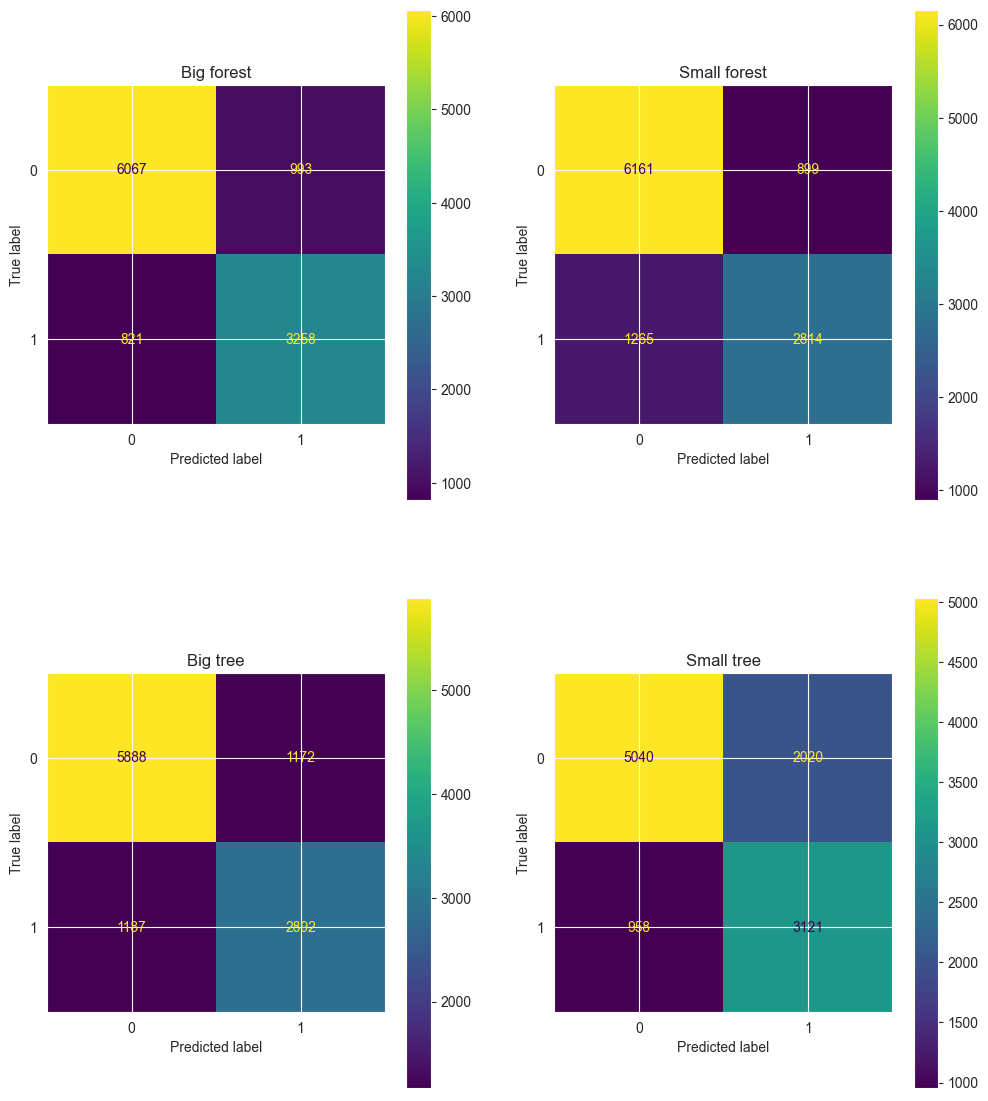

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 14))
confmatrix1=confusion_matrix(Y_test, predictions_forest_big)
cm_display = ConfusionMatrixDisplay(confmatrix1).plot(ax=axs[0, 0])
axs[0, 0].set_title('Big forest')
confmatrix2=confusion_matrix(Y_test, predictions_forest_small)
cm_display = ConfusionMatrixDisplay(confmatrix2).plot(ax=axs[0, 1])
axs[0, 1].set_title('Small forest')
confmatrix3=confusion_matrix(Y_test, predictions_tree_big)
cm_display = ConfusionMatrixDisplay(confmatrix3).plot(ax=axs[1, 0])
axs[1, 0].set_title('Big tree')
confmatrix4=confusion_matrix(Y_test, predictions_tree_small)
cm_display = ConfusionMatrixDisplay(confmatrix4).plot(ax=axs[1, 1])
axs[1, 1].set_title('Small tree')


In [10]:
costmatrix=[[20,-90],[-100,100]] #TN,FP,FN,TP

Text(0.5, 1.0, 'Small tree')

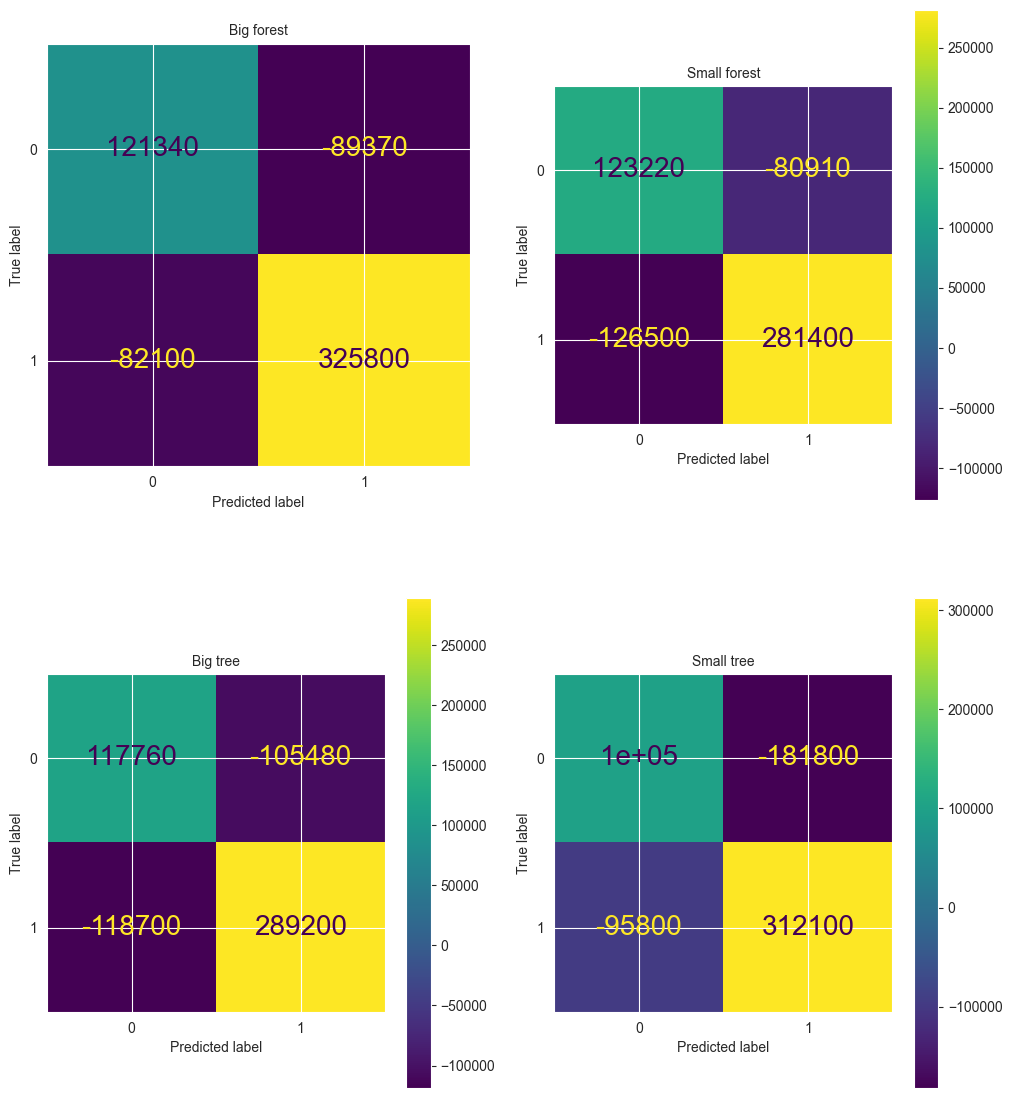

In [18]:
# Set the default text font size
plt.rc('font', size=20)
# Set the axes title font size
plt.rc('axes', titlesize=10)
# Set the axes labels font size
plt.rc('axes', labelsize=10)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
# Set the legend font size
plt.rc('legend', fontsize=10)
# Set the font size of the figure title
plt.rc('figure', titlesize=10)
fig, axs = plt.subplots(2, 2, figsize=(12, 14))
confmatrix1=confusion_matrix(Y_test, predictions_forest_big)*costmatrix
cm_display = ConfusionMatrixDisplay(confmatrix1).plot(ax=axs[0, 0])
axs[0, 0].set_title('Big forest')
confmatrix2=confusion_matrix(Y_test, predictions_forest_small)*costmatrix
cm_display = ConfusionMatrixDisplay(confmatrix2).plot(ax=axs[0, 1])
axs[0, 1].set_title('Small forest')
confmatrix3=confusion_matrix(Y_test, predictions_tree_big)*costmatrix
cm_display = ConfusionMatrixDisplay(confmatrix3).plot(ax=axs[1, 0])
axs[1, 0].set_title('Big tree')
confmatrix4=confusion_matrix(Y_test, predictions_tree_small)*costmatrix
cm_display = ConfusionMatrixDisplay(confmatrix4).plot(ax=axs[1, 1])
axs[1, 1].set_title('Small tree')

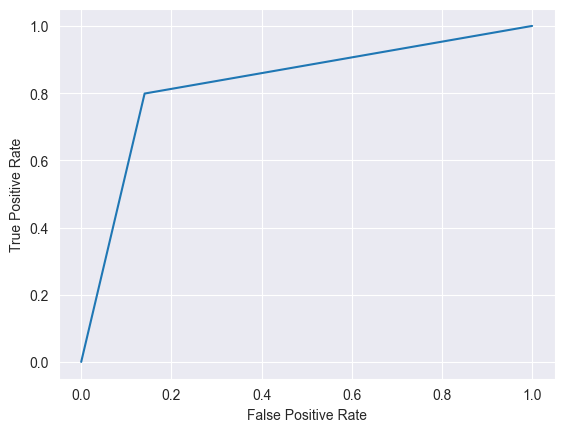

In [12]:
fpr, tpr,_thresholds  = roc_curve(Y_test, predictions_forest_big, pos_label=forest_big.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [13]:
print(confmatrix1*costmatrix)
print(confmatrix2*costmatrix)
print(confmatrix3*costmatrix)
print(confmatrix4*costmatrix)

[[ 2426800  8043300]
 [ 8210000 32580000]]
[[ 2464400  7281900]
 [12650000 28140000]]
[[ 2355200  9493200]
 [11870000 28920000]]
[[ 2016000 16362000]
 [ 9580000 31210000]]


In [14]:

report = classification_report(Y_test, predictions_forest_small)
confmatrix=confusion_matrix(Y_test, predictions_forest_small)
print(report)
print(confmatrix)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7060
           1       0.76      0.69      0.72      4079

    accuracy                           0.81     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.81      0.80     11139

[[6161  899]
 [1265 2814]]


In [15]:
accuracy_score(Y_test, predictions_tree_small)

NameError: name 'accuracy_score' is not defined

In [ ]:
plt.figure(figsize=(24,18))
plot_tree(tree_small_model,feature_names = features,
          class_names=classNames,
          filled = True,fontsize=10)
plt.savefig('decisionTree.png')

In [ ]:
y_pred_dt_prob = tree_big_model.predict_proba(X_test.values)[:,1]
fpr, tpr, _thresholds  = roc_curve(Y_test, y_pred_dt_prob, pos_label=tree_big_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
roc_auc_score(Y_test, y_pred_dt_prob)